In [1]:
import numpy as np
import pandas as pd

In [2]:
url = r'https://lazyprogrammer.me/course_files/spam.csv'
storage_options = {'User-Agent': 'Mozilla/5.0'}
df = pd.read_csv(url, storage_options=storage_options, encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
#dropping unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['Labels', 'Data']
df.head()

,Labels,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ham = 0  
Spam = 1

In [7]:
df['bin_rep'] = df['Labels'].map({'ham' : 0, 'spam': 1})
df

,Labels,Data,bin_rep
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
Y = df['bin_rep'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['Data'], Y, test_size=0.33)
print(f'Shape of X_train : {X_train.shape}\n Shape of X_test : {X_test.shape}')

Shape of X_train : (3733,)
 Shape of X_test : (1839,)


In [10]:
type(X_train)

pandas.core.series.Series

In [11]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [20]:
word2index = tokenizer.word_index
V =  len(word2index)
print(f'Found {V} unique tokens')

Found 7172 unique tokens


In [14]:
#padding the sequences to make them uniform to feed into CNN
data_train = pad_sequences(sequences_train)
print(f'Shape of Training data = {data_train.shape}')

T= data_train.shape[1]

Shape of Training data = (3733, 189)


In [36]:
#padding the sequences to make them uniform to feed into CNN
data_test = pad_sequences(sequences_test, maxlen=T)  
#!!!!!!!max len is very important to add...else data_train and data_test will be of diff shapes and model wont fit
print(f'Shape of Testing data = {data_test.shape}')

Shape of Testing data = (1839, 189)


In [41]:
#creating the model
from keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D,Embedding, Conv1D
from keras.models import Model

D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D) (i)
x = Conv1D(32, 3, activation='relu') (x)
x = MaxPooling1D(3) (x)
x = Conv1D(64, 3, activation='relu') (x)
x = MaxPooling1D(3) (x)
x = Conv1D(128, 3, activation='relu') (x)
x = GlobalMaxPooling1D() (x)
x = Dense(1, activation = 'sigmoid') (x)


model = Model(i, x)

In [42]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 189, 20)           143460    
                                                                 
 conv1d_6 (Conv1D)           (None, 187, 32)           1952      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 62, 32)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 60, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 64)           0         
 1D)                                                       

In [43]:
#compile
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
)

In [44]:
tf.config.run_functions_eagerly(False)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',)
hist = model.fit(x=data_train,
                 y= Y_train, 
                 validation_data=(data_test, Y_test), 
                 epochs=20, 
                 callbacks = [early_stopping_callback]
                )

Epoch 1/20
117/117 [==============================] - 2s 10ms/step - loss: 0.3903 - accuracy: 0.8599 - val_loss: 0.2836 - val_accuracy: 0.8662
Epoch 2/20
117/117 [==============================] - 1s 7ms/step - loss: 0.1561 - accuracy: 0.9346 - val_loss: 0.1058 - val_accuracy: 0.9750
Epoch 3/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0266 - accuracy: 0.9925 - val_loss: 0.0773 - val_accuracy: 0.9831
Epoch 4/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0724 - val_accuracy: 0.9831
Epoch 5/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0836 - val_accuracy: 0.9848
Epoch 6/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0783 - val_accuracy: 0.9810
Epoch 7/20
117/117 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0771 - val_accuracy: 0.9815
Epoch

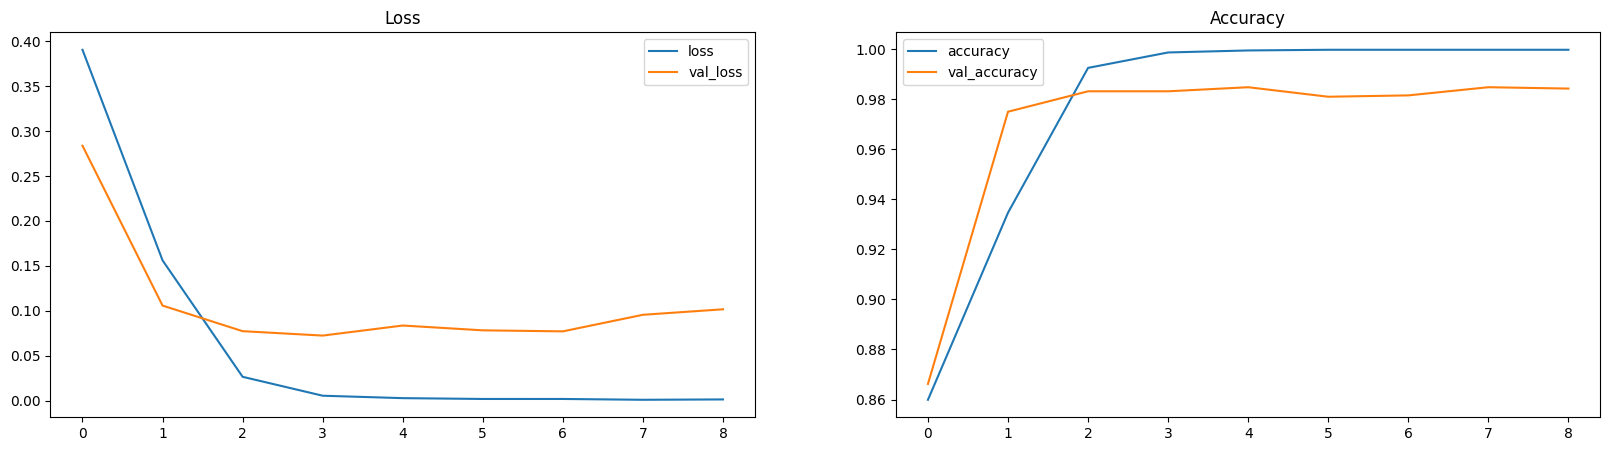

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols =2, figsize= (20, 5))

ax[0].plot(hist.history['loss'], label = 'loss')
ax[0].plot(hist.history['val_loss'], label = 'val_loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['accuracy'], label = 'accuracy')
ax[1].plot(hist.history['val_accuracy'], label = 'val_accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()

plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues) :
    """
    This function prints and plots the confusion matrix
    """
    if normalize :
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

58/58 [==============================] - 0s 4ms/step
[[1589   25]
 [   4  221]]


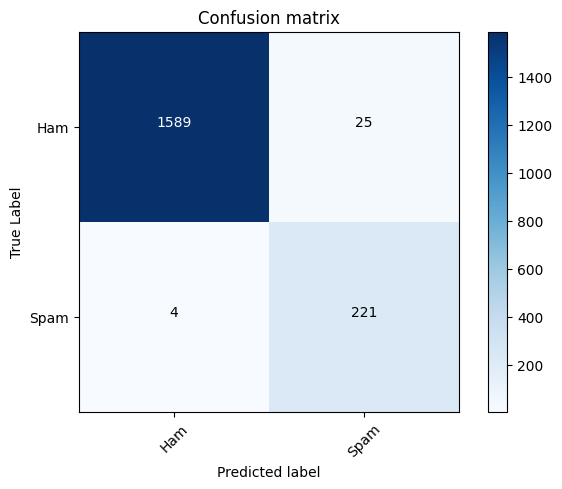

In [61]:
P_test = np.round(model.predict(data_test))
cm = confusion_matrix(P_test, Y_test)
plot_confusion_matrix(cm, ['Ham', 'Spam'], normalize=False)